In [ ]:
#Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#Loading the dataset
employee = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Employee.csv")

In [ ]:
#Reading the first few rows of the dataset
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
#Getting the shape of the dataset
employee.shape

(4653, 9)

In [ ]:
#Getting the columns
employee.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
#Check for any missing values
employee.isnull().values.any()

False

#Question 1

####(a) For each education level, what percentage of the employees are female?

In [ ]:
#Get different educaltion levels
employee["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
#Grouping the dataframe by education and gender
Grouped = employee.groupby('Education')['Gender'].value_counts()
Grouped

Education  Gender
Bachelors  Male      2166
           Female    1435
Masters    Male       502
           Female     371
PHD        Male       110
           Female      69
Name: Gender, dtype: int64

In [ ]:
#Get the total education count for each level
Total_Education_Count = employee.groupby('Education')['Gender'].count()
Total_Education_Count

Education
Bachelors    3601
Masters       873
PHD           179
Name: Gender, dtype: int64

In [ ]:
#Find the percentage of females in each level
percentage_of_female = (Grouped.loc[:, 'Female'] / Total_Education_Count) * 100
percentage_of_female

Education
Bachelors    39.850042
Masters      42.497136
PHD          38.547486
Name: Gender, dtype: float64

####(b) On a single plot, make three line plots, one for each City, with the variable JoiningYear on the x-axis and cumulative number of hires up to that year on the y-axis (Note: Each row is considered a hire).

In [ ]:
#Check different types of City
employee['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [ ]:
#Group employee dataframe by city and joining year and find the cumulative sum of hires by year
cumulative_hires_by_year = employee.groupby(['City', 'JoiningYear']).size().groupby('City').cumsum()
cumulative_hires_by_year

City       JoiningYear
Bangalore  2012            302
           2013            642
           2014           1029
           2015           1343
           2016           1656
           2017           2025
           2018           2228
New Delhi  2012             92
           2013            241
           2014            367
           2015            501
           2016            596
           2017           1070
           2018           1157
Pune       2012            110
           2013            290
           2014            476
           2015            809
           2016            926
           2017           1191
           2018           1268
dtype: int64

In [ ]:
#Make a new dayframe for the cumulaive hires by year
cumulative_hires_by_year_df = cumulative_hires_by_year.reset_index(name = 'Cumulative Number Hires')
cumulative_hires_by_year_df

,City,JoiningYear,Cumulative Number Hires
0,Bangalore,2012,302
1,Bangalore,2013,642
2,Bangalore,2014,1029
3,Bangalore,2015,1343
4,Bangalore,2016,1656
5,Bangalore,2017,2025
6,Bangalore,2018,2228
7,New Delhi,2012,92
8,New Delhi,2013,241
9,New Delhi,2014,367


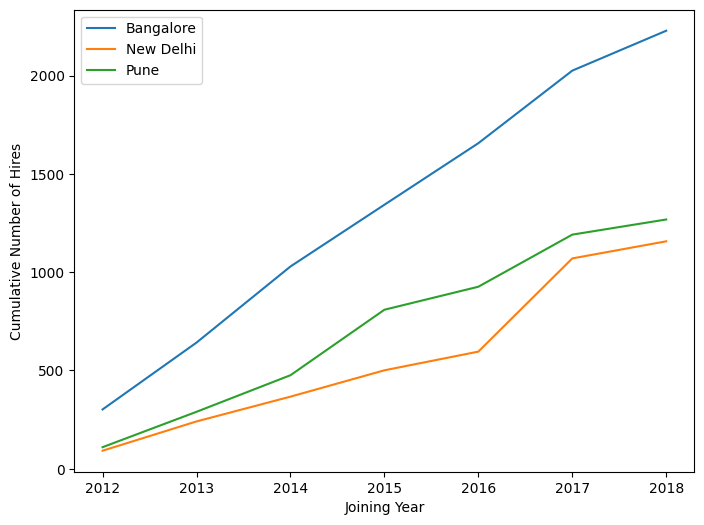

In [ ]:
#Plot line plots for each city
plt.figure(figsize=(8, 6))
sns.lineplot(data = cumulative_hires_by_year_df, x = 'JoiningYear', y = 'Cumulative Number Hires', hue = 'City')
plt.xlabel('Joining Year')
plt.ylabel('Cumulative Number of Hires')
plt.legend()
plt.show()

####(c)  Create side-by-side boxplots of Age vs Gender faceted by City on the rows and Education on the columns.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


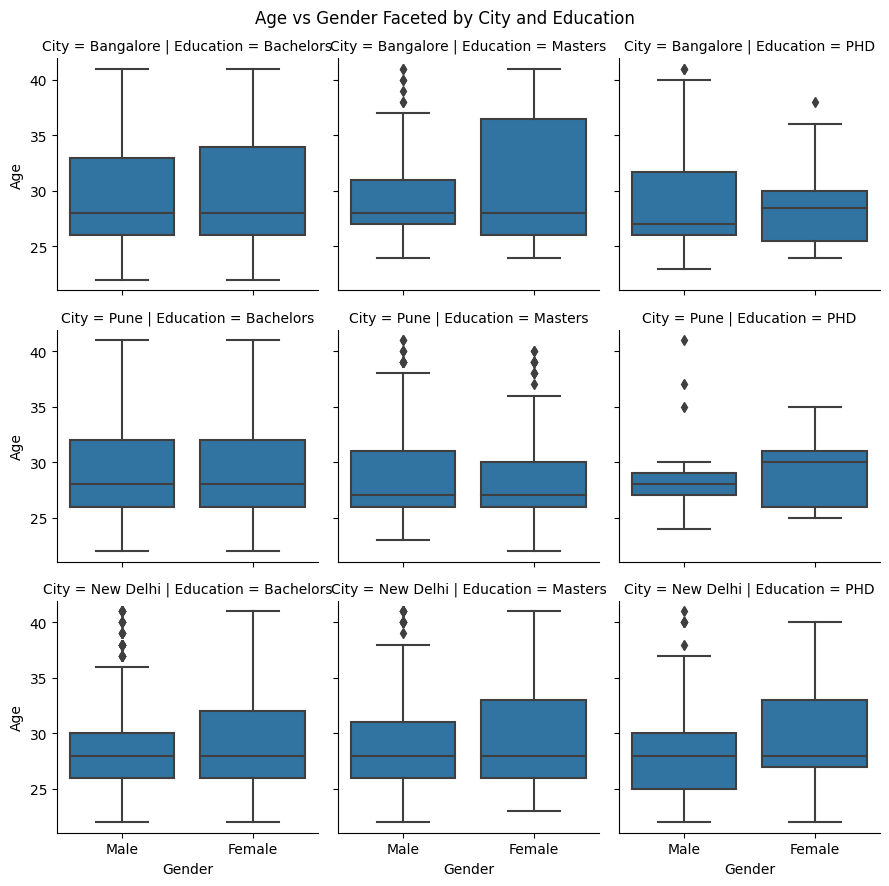

In [ ]:
sbs = sns.FacetGrid(employee, row='City', col='Education')
sbs.fig.suptitle('Age vs Gender Faceted by City and Education')
sbs.map(sns.boxplot, 'Gender', 'Age')

plt.show()

####(d) For each JoiningYear, compute the ratio of the number of Bachelor’s degrees hired to Ph.D’s hired. Which year has the highest ratio and what is that ratio? For each City, compute the ratio of the number of Bachelor’s degrees hired to Ph.D’s hired. Which city has the highest ratio and what is that ratio? You have now found a year and a city. How many master’s level people were hired in the year and city that you just found?

In [ ]:
#For each JoiningYear, compute the ratio of the number of Bachelor’s degrees hired to Ph.D’s hired.

#Find the ratio of Bachelor's to Ph.D. hires for each JoiningYear using groupby
ratio1 = employee[employee['Education'].isin(['Bachelors', 'PHD'])].groupby('JoiningYear')['Education'].value_counts().unstack()
ratio1['Bachelor_PHD_ratio'] = ratio1['Bachelors'] / ratio1['PHD']
ratio1

Education,Bachelors,PHD,Bachelor_PHD_ratio
JoiningYear,,,
2012,441,14,31.500000
2013,531,40,13.275000
2014,605,20,30.250000
2015,640,33,19.393939
2016,461,22,20.954545
2017,660,21,31.428571
2018,263,29,9.068966


##Which year has the highest ratio and what is that ratio?

###From the output, the year with the highest ratio is 2012 with a ratio of 31.5

In [ ]:
#For each City, compute the ratio of the number of Bachelor’s degrees hired to Ph.D’s hired.

#Find the ratio of Bachelor's to Ph.D. hires for each JoiningYear using groupby
ratio2 = employee[employee['Education'].isin(['Bachelors', 'PHD'])].groupby('City')['Education'].value_counts().unstack()
ratio2['Bachelor_PHD_ratio'] = ratio2['Bachelors'] / ratio2['PHD']
ratio2

Education,Bachelors,PHD,Bachelor_PHD_ratio
City,,,
Bangalore,2052,52,39.461538
New Delhi,537,103,5.213592
Pune,1012,24,42.166667


##Which city has the highest ratio and what is that ratio?

###From the output, the city with the highest ratio is Pune, with a ratio of 42.17

###You have now found a year and a city. How many master’s level people were hired in the year and city that you just found?

In [ ]:
#Find the number of master's level hires from Pune in 2012
#Filter employee for the year 2012 and the city Pune
a = employee[(employee['JoiningYear'] == 2012) & (employee['City'] == 'Pune')]
number_of_masters_hires = a[a['Education'] == 'Masters'].shape[0]
print("The number of masters level people from Pune and hired in 2012 is :", number_of_masters_hires)

The number of masters level people from Pune and hired in 2012 is : 13


#Question2

In [ ]:
#Loading the dataset
stops = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_List_of_L_Stops.csv")
entries = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/CTA_entries.csv")

In [ ]:
#Reading the first few rows of the dataset
stops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30082,E,Cicero (Loop-bound),Cicero,Cicero (Pink Line),40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)"
1,30151,E,Central Park (Loop-bound),Central Park,Central Park (Pink Line),40780,True,False,False,False,False,False,False,False,True,False,"(41.853839, -87.714842)"
2,30184,W,Halsted/63rd (Ashland-bound),Halsted,Halsted (Green Line),40940,True,False,False,True,False,False,False,False,False,False,"(41.778943, -87.644244)"
3,30044,N,Cumberland (O'Hare-bound),Cumberland,Cumberland (Blue Line),40230,True,False,True,False,False,False,False,False,False,False,"(41.984246, -87.838028)"
4,30092,E,Racine (O'Hare-bound),Racine,Racine (Blue Line),40470,False,False,True,False,False,False,False,False,False,False,"(41.87592, -87.659458)"


In [ ]:
#Getting the shape of stops
stops.shape

(300, 17)

In [ ]:
#Getting the columns
stops.columns

Index(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'STATION_NAME',
       'STATION_DESCRIPTIVE_NAME', 'MAP_ID', 'ADA', 'RED', 'BLUE', 'G', 'BRN',
       'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'],
      dtype='object')

In [ ]:
#Reading the first few rows of the dataset
entries.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [ ]:
#Getting the shape of stops
entries.shape

(1171469, 5)

In [ ]:
#Getting the columns
entries.columns

Index(['station_id', 'stationname', 'date', 'daytype', 'rides'], dtype='object')

#(a)
### Using the stops data set, create a data set that only includes stops on the red line and removes duplicated MAP IDs. Merge the stops onto the entries data set. (Note: station id in entries links to MAP ID in stops!)

In [ ]:
#Filter stops for the red line
red_line_stops = stops[stops['RED'] == True]

#Remove duplicated MAP IDs
red_line_stops = red_line_stops.drop_duplicates(subset='MAP_ID')

#Merge entries onto red_line_stops using 'station_id' and 'MAP_ID' as the key
merged_data = entries.merge(red_line_stops, left_on='station_id', right_on='MAP_ID', how='inner')
merged_data.head()

,station_id,stationname,date,daytype,rides,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,41000,Cermak-Chinatown,12/18/2017,W,3636,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
1,41000,Cermak-Chinatown,12/04/2017,W,3842,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
2,41000,Cermak-Chinatown,12/21/2017,W,3701,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
3,41000,Cermak-Chinatown,12/22/2017,W,3688,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"
4,41000,Cermak-Chinatown,12/30/2017,A,2518,30193,N,Cermak-Chinatown (Howard-bound),Cermak-Chinatown,Cermak-Chinatown (Red Line),...,True,False,False,False,False,False,False,False,False,"(41.853206, -87.630968)"


#(b)
###Using this merged data set, compute the average number of rides per day for each station on the red line. Next compute the average number of rides per day for each station for each month (i.e.average rides per day at Loyola at January, average rides per day at Loyola in February, etc.).

In [ ]:
#Calculate the average rides per day for each station
average_rides_per_station_day = merged_data.groupby('stationname')['rides'].mean(numeric_only=True).reset_index()
average_rides_per_station_day.columns = ['stationname', 'average_rides_per_day']
average_rides_per_station_day.head()

,stationname,average_rides_per_day
0,47th-Dan Ryan,2373.420198
1,63rd-Dan Ryan,2607.493403
2,69th,4471.159624
3,79th,5799.328896
4,87th,3671.289830


In [ ]:
#Continued
#Convert the 'date' column to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

#Extract the month from the 'date' column and create a new 'MONTH' column
merged_data['MONTH'] = merged_data['date'].dt.month

#Group by 'stationname' and 'MONTH' and calculate the average rides per day for each month
average_rides_per_station_month = merged_data.groupby(['stationname', 'MONTH'])['rides'].mean().reset_index()
average_rides_per_station_month.columns = ['stationname', 'MONTH', 'average_rides_per_day_month']

average_rides_per_station_month.head()

,stationname,MONTH,average_rides_per_day_month
0,47th-Dan Ryan,1,2197.267882
1,47th-Dan Ryan,2,2348.779661
2,47th-Dan Ryan,3,2386.911641
3,47th-Dan Ryan,4,2340.462319
4,47th-Dan Ryan,5,2381.604488


#(c)
###Using this two variables found in the previous part, for each station create a variable called ratio which is the ratio of rides per day per month divided by rides per day. (This is essentially a measure of how far away ridership in a given month gets away from the overall average at a stop with values larger than 1 indicating a sharp increase and values less than 1 a sharp decrease). Display the top ten largest ratios and comment on and reason you believe these particular stops and months are the top of the list.

In [ ]:
#Left join the two DataFrames on 'stationname'
ratio_data = average_rides_per_station_month.merge(
    average_rides_per_station_day, on='stationname', how='left'
)

#Calculate the ratio
ratio_data['ratio'] = ratio_data['average_rides_per_day_month'] / ratio_data['average_rides_per_day']

ratio_data.head()

,stationname,MONTH,average_rides_per_day_month,average_rides_per_day,ratio
0,47th-Dan Ryan,1,2197.267882,2373.420198,0.925781
1,47th-Dan Ryan,2,2348.779661,2373.420198,0.989618
2,47th-Dan Ryan,3,2386.911641,2373.420198,1.005684
3,47th-Dan Ryan,4,2340.462319,2373.420198,0.986114
4,47th-Dan Ryan,5,2381.604488,2373.420198,1.003448


In [ ]:
#Sort the DataFrame in descending order of the 'ratio' column and select the top 10 rows
top_10_ratios = ratio_data.sort_values(by='ratio', ascending=False).head(10)

top_10_ratios.head(10)

,stationname,MONTH,average_rides_per_day_month,average_rides_per_day,ratio
79,Addison-North Main,8,9100.333333,6740.117168,1.350174
78,Addison-North Main,7,8999.609078,6740.117168,1.335230
77,Addison-North Main,6,8856.804348,6740.117168,1.314043
225,Harrison,10,3776.458944,2909.892618,1.297800
177,Fullerton,10,11853.401760,9363.729950,1.265885
368,Sox-35th-Dan Ryan,9,4510.198413,3578.194356,1.260468
80,Addison-North Main,9,8382.192424,6740.117168,1.243627
296,Loyola,9,5121.037879,4193.096959,1.221302
367,Sox-35th-Dan Ryan,8,4358.785924,3578.194356,1.218152
176,Fullerton,9,11281.986364,9363.729950,1.204860


###Addison-North Main and Fullerton stops are close to Wrigley Field, home of the Chicago Cubs, which attracts large crowds during baseball season.

#(d)
### Compute the standard deviation of this ratio for each station and find the stations with the 5 largest standard deviations. Using these five stations, a line plot (one line for each station) with month on the x-axis and ratio on the y-axis.

In [ ]:
#Calculate the standard deviation of the ratio for each station
standard_deviation_data = ratio_data.groupby('stationname')['ratio'].std(numeric_only=True).reset_index()
standard_deviation_data.columns = ['stationname', 'sd_ratio']

#Find the stations with the 5 largest standard deviations
top_5_stations = standard_deviation_data.nlargest(5, 'sd_ratio')

#Filter the 'ratio_data' for the top 5 stations
top_5_data = ratio_data[ratio_data['stationname'].isin(top_5_stations['stationname'])]

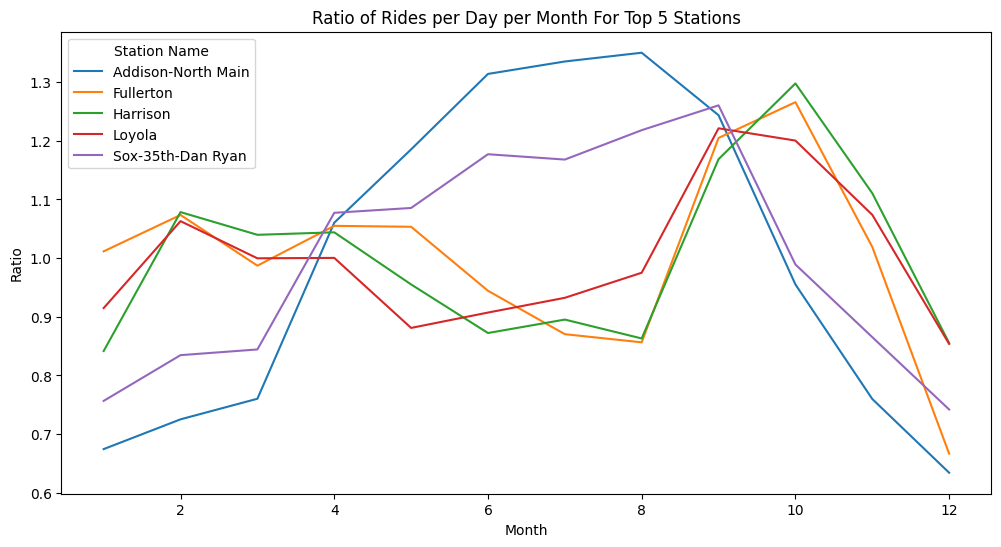

In [ ]:
#Create a line plot for each station
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_data, x='MONTH', y='ratio', hue='stationname', style='stationname', dashes=False)
plt.title('Ratio of Rides per Day per Month For Top 5 Stations')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.legend(title='Station Name')
plt.show()